In [1]:
%matplotlib inline 
import matplotlib.pylab
%pylab inline
pylab.rcParams['figure.figsize']=(10,6)
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

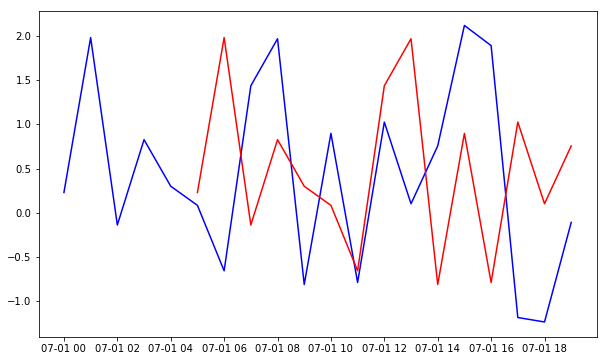

In [3]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

In [4]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [5]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-1.339322,-1.350259,-0.217497
2016-07-01 00:00:01,0.957235,0.380329,-0.150962
2016-07-01 00:00:02,-1.146361,0.131833,-0.784469
2016-07-01 00:00:03,0.112355,-0.297603,-1.740508
2016-07-01 00:00:04,-0.488809,0.184331,0.579685


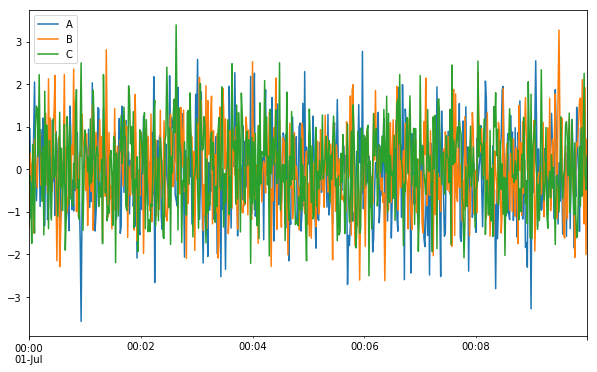

In [6]:
df.plot()

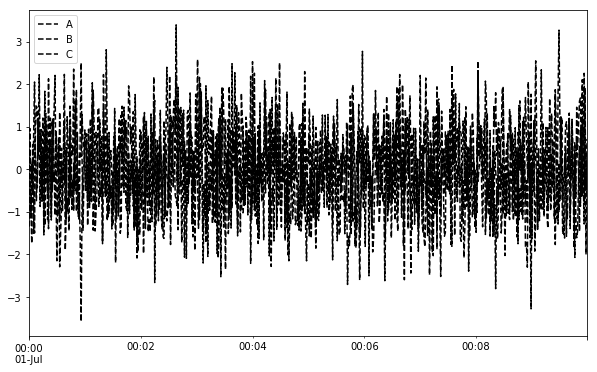

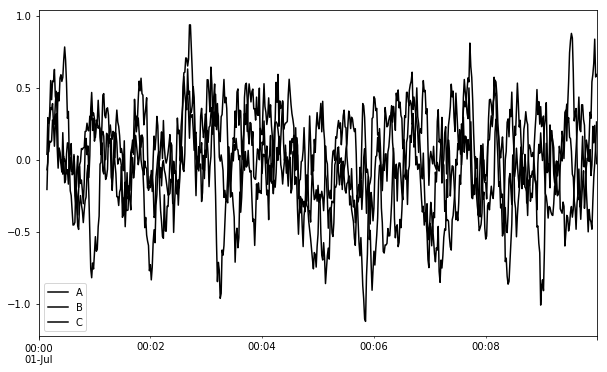

In [7]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

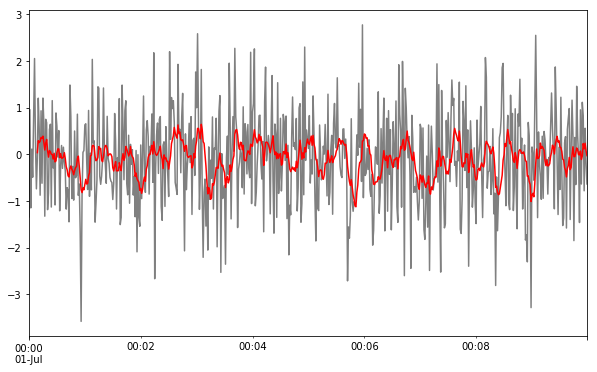

In [8]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

In [9]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/raffy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=15,min_periods=2,adjust=True).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.114492,-0.427279,-0.182012
2016-07-01 00:00:02,-0.505259,-0.215544,-0.410161
2016-07-01 00:00:03,-0.318699,-0.240332,-0.812012
2016-07-01 00:00:04,-0.362354,-0.131352,-0.454867
2016-07-01 00:00:05,-0.099779,-0.442301,-0.525400
2016-07-01 00:00:06,0.343103,-0.207120,-0.725960
2016-07-01 00:00:07,0.326953,-0.121993,-0.400226
2016-07-01 00:00:08,0.136604,-0.120750,-0.063158
2016-07-01 00:00:09,0.098828,-0.174204,0.187644


In [10]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [11]:
df.head()

,A,B,C,D
2016-06-06,1.241762,-0.347601,1.637343,0.425785
2016-06-07,-0.243412,0.552709,1.519943,0.316622
2016-06-08,0.314007,-0.332566,1.030933,-1.128180
2016-06-09,0.218776,-2.519180,-0.040947,-0.209580
2016-06-10,-0.396476,-0.959179,1.108213,0.715632


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117040610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116efe8d0>], dtype=object)

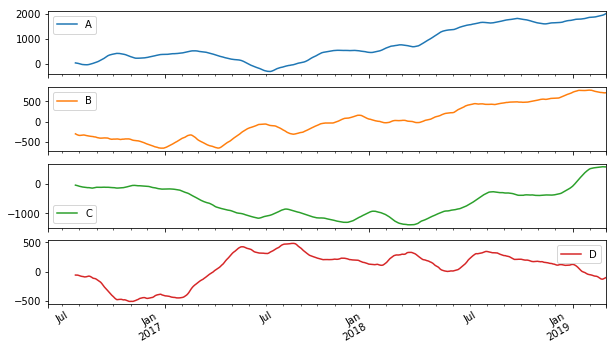

In [12]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [13]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.230348,2.055959,0.745305,0.880243


In [14]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.120056,-0.071247,2.397315,0.584095
2016-06-08,1.184156,-0.089984,2.994283,0.260806
2016-06-09,1.270901,-0.729148,3.282530,0.046766
2016-06-10,1.243652,-1.304482,3.677121,0.061468


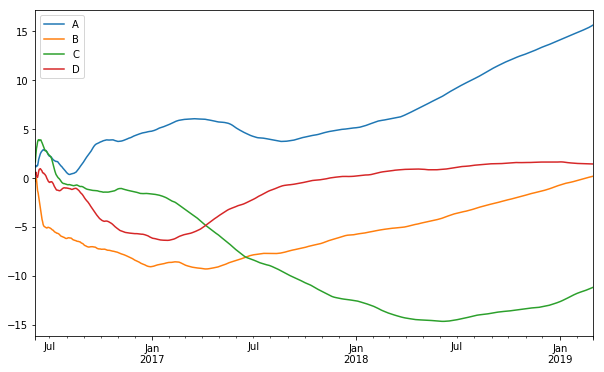

In [15]:
df.expanding(min_periods = 1).mean().plot()

In [16]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

- Yes, an expanding window will be a more stable statistic because it is the average of the data.
- One might use the rolling statistic to give more weight to recent data over all the data in time available.

In [17]:
# EWMA
# Why use EWMA?

EWMA(Exponentially Weighted Moving Average) places a higher weight on recent data. As such, it is better to use if one wants to expand a recent data's influence on the moving average.

In [18]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [19]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [20]:
from pandas_datareader import data, wb
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2017-9-30')
f = data.DataReader("AAPL", 'yahoo', start, end)
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,27.083506,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.505054,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.552608,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.114347,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,27.064222,119282800


/Users/raffy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


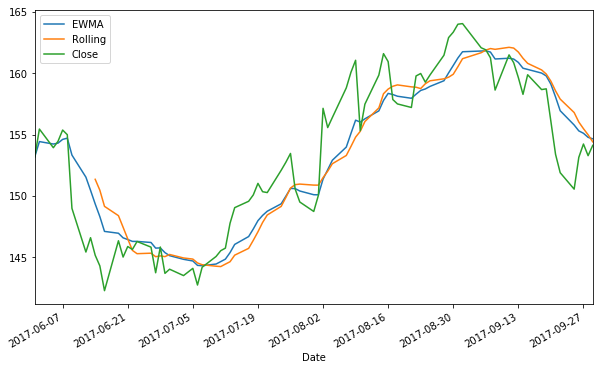

In [21]:
pd.ewma(f['2017-06':'2017-09']['Close'], span = 10).plot(label = 'EWMA', legend = True)
f['2017-06':'2017-09']['Close'].rolling(window = 10).mean().plot(label = 'Rolling', legend = True)
f['2017-06':'2017-09']['Close'].plot(label = 'Close', legend = True)